In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf
from datetime import datetime

In [ ]:
start_date = '2012-01-01'
end_date = datetime.now()
df = yf.download("AAPL", start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3012

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

#scaled_data

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
#        print(x_train)
#        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2952/2952 ━━━━━━━━━━━━━━━━━━━━ 150s 50ms/step - loss: 0.0030
Epoch 2/10
2952/2952 ━━━━━━━━━━━━━━━━━━━━ 202s 50ms/step - loss: 5.6370e-04
Epoch 3/10
2952/2952 ━━━━━━━━━━━━━━━━━━━━ 201s 49ms/step - loss: 2.8758e-04
Epoch 4/10
2952/2952 ━━━━━━━━━━━━━━━━━━━━ 145s 49ms/step - loss: 2.0363e-04
Epoch 5/10
2952/2952 ━━━━━━━━━━━━━━━━━━━━ 201s 49ms/step - loss: 2.6951e-04
Epoch 6/10
2952/2952 ━━━━━━━━━━━━━━━━━━━━ 203s 49ms/step - loss: 2.0156e-04
Epoch 7/10
2952/2952 ━━━━━━━━━━━━━━━━━━━━ 202s 49ms/step - loss: 1.9962e-04
Epoch 8/10
2952/2952 ━━━━━━━━━━━━━━━━━━━━ 201s 49ms/step - loss: 1.7249e-04
Epoch 9/10
2952/2952 ━━━━━━━━━━━━━━━━━━━━ 143s 48ms/step - loss: 1.3142e-04
Epoch 10/10
2952/2952 ━━━━━━━━━━━━━━━━━━━━ 205s 49ms/step - loss: 1.5353e-04


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
#test_data = scaled_data[training_data_len - 60:  , :]
st_len=training_data_len -60 - len(dataset) + training_data_len
test_data = scaled_data[ st_len : training_data_len  , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step


<ipython-input-57-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


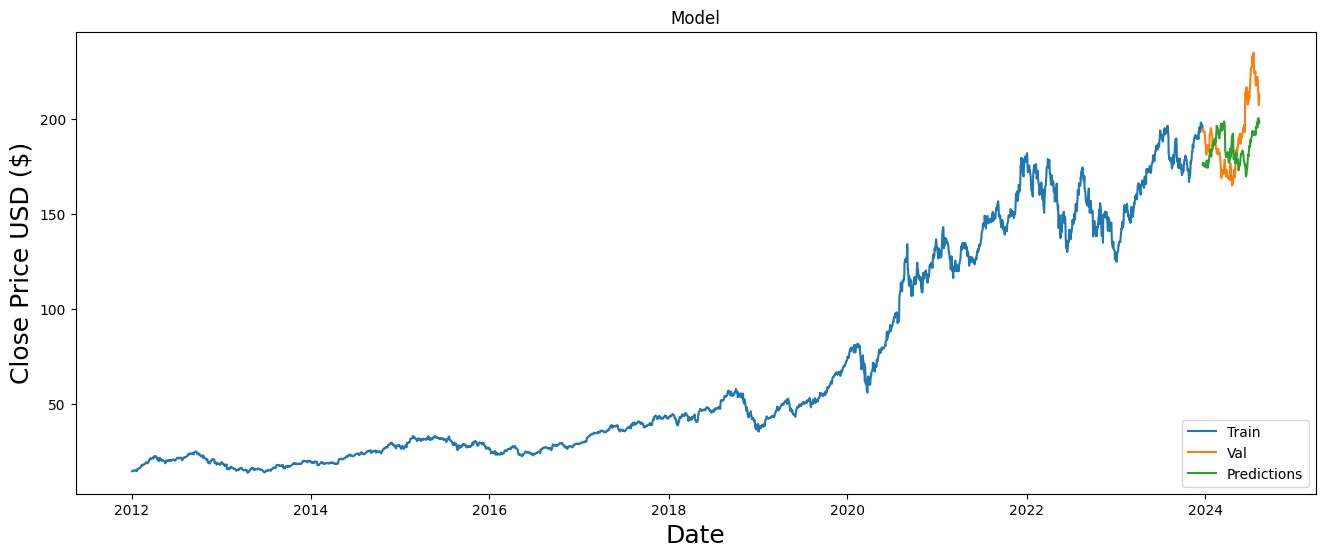

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

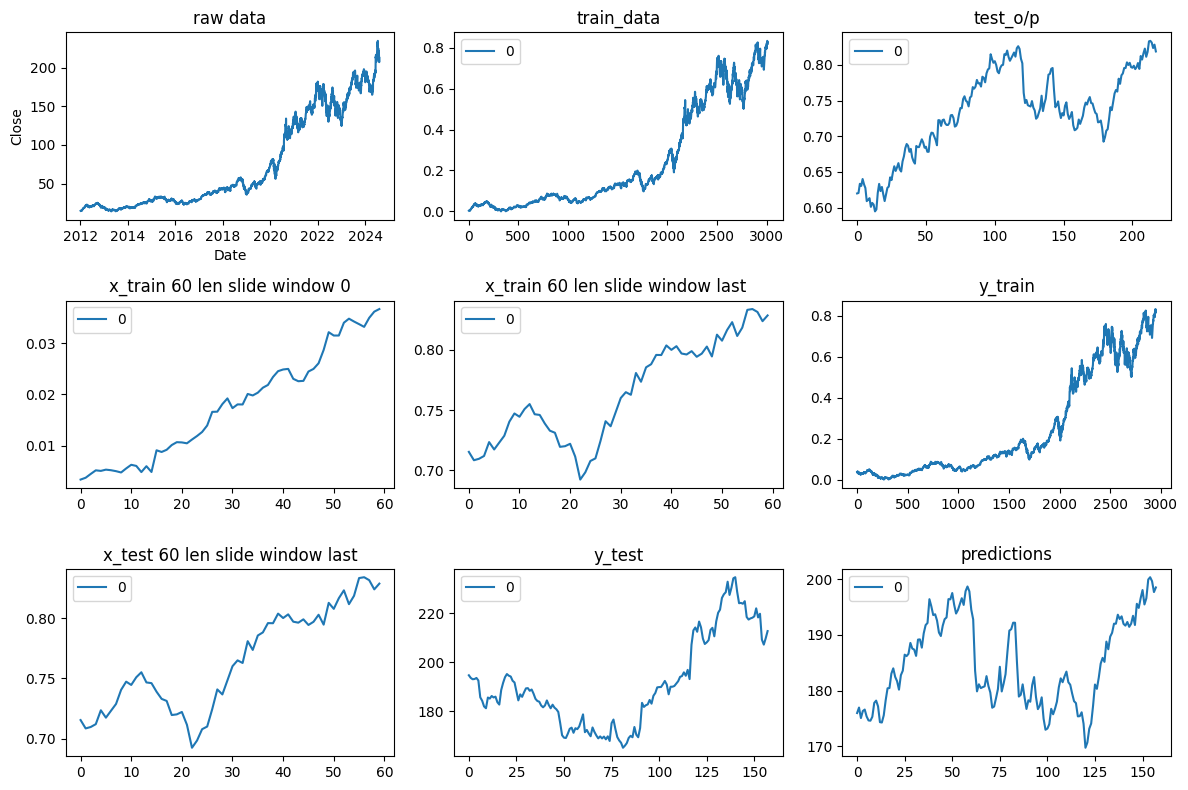

In [ ]:
fig, axes = plt.subplots(3,3,figsize=(12,8))
sns.lineplot(df, x='Date', y='Close' , ax=axes[0,0]).set_title('raw data')
sns.lineplot(train_data , ax=axes[0,1]).set_title('train_data')
sns.lineplot(test_data , ax=axes[0,2]).set_title('test_o/p')
sns.lineplot(x_train[0] , ax=axes[1,0]).set_title('x_train 60 len slide window 0')
sns.lineplot(x_train[-1] , ax=axes[1,1]).set_title('x_train 60 len slide window last ')
sns.lineplot(y_train , ax=axes[1,2]).set_title('y_train')
sns.lineplot(x_test[-1] , ax=axes[2,0]).set_title('x_test 60 len slide window last')
sns.lineplot(y_test , ax=axes[2,1]).set_title('y_test')
sns.lineplot(predictions , ax=axes[2,2]).set_title('predictions')

plt.tight_layout()
plt.show()